Testy biblioteki signature_detect

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from signature_detect.loader import Loader
from signature_detect.extractor import Extractor
from signature_detect.cropper import Cropper
from signature_detect.judger import Judger

%load_ext autoreload
%autoreload 2

In [3]:
path = "C:\Dane\projekty\FOB\zestaw3"
os.chdir(path)

In [4]:
imglist = ["os_022415_1.jpeg","zu_002619_2.jpeg","zu_022415_2.jpeg","zu_780922_2.jpeg","kl_bien_1.jpeg",
           "kl_czer_1.jpeg","kw_003221_4.jpeg","kw_012722_3.jpeg","kw_033013_4.jpeg","kw_577069_4.jpeg"]


In [5]:
def show_image(img):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(img)
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

Wczytanie obrazu

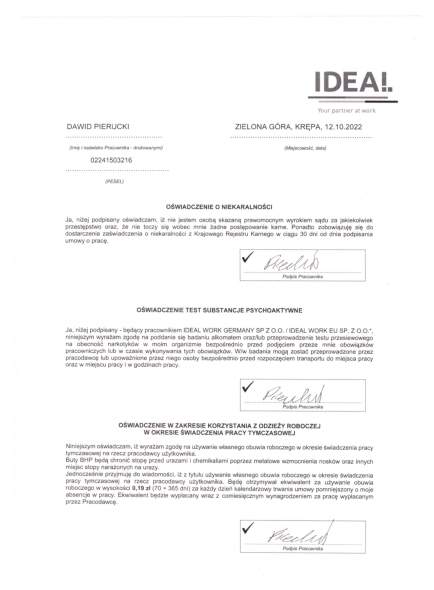

In [12]:
imgname = imglist[0]
image = cv2.imread(imgname)
show_image(image)

## Loader

The loader reads the file and creates a mask. 

The mask is a numpy array. The bright parts are set to 255, the rest is set to 0.

In [13]:
loader = Loader()
print(loader)


Loader
low_threshold = (0, 0, 250)
high_threshold = (255, 255, 255)



[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[  0 255]


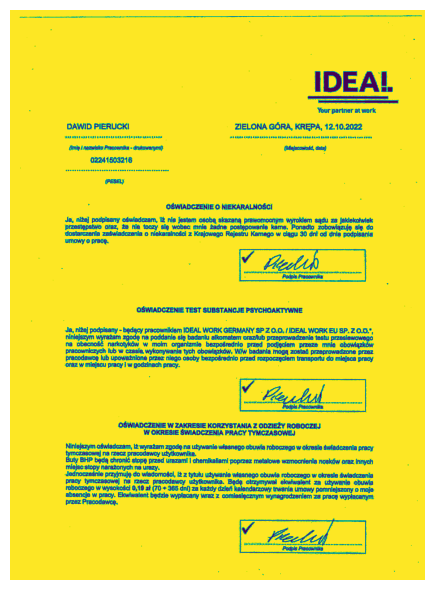

In [14]:
mask = loader.get_masks(imgname)[0]
print(mask)
print(np.unique(mask))
show_image(mask)
# plt.imsave('./data/output/mask.jpeg', mask)

## Extractor

The extractor 

1. generates the regions from the mask.
2. removes the small and the big region because the signature is neither too big nor too small.

In [15]:
extractor = Extractor(amplfier=15)
print(extractor)


Extractor
outlier_weight = 3
outlier_bias = 100
> small_outlier_size = outlier_weight * average_region_size + outlier_bias
amplfier = 15
> large_outlier_size = amplfier * small_outlier_size
min_area_size = 10 (pixels)
> min_area_size is used to calculate average_region_size.



[  0 255]


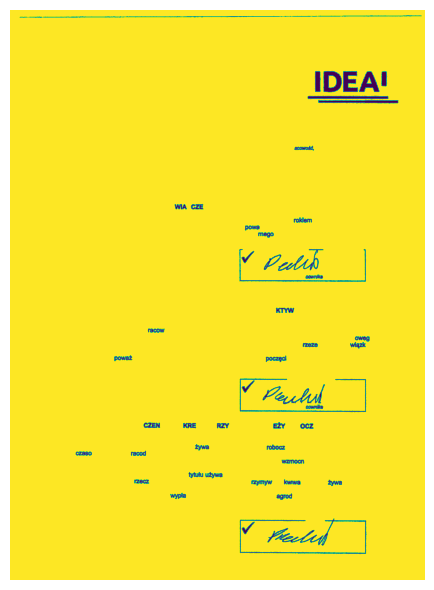

In [16]:
labeled_mask = extractor.extract(mask)
print(np.unique(labeled_mask))
show_image(labeled_mask)
# plt.imsave('./data/output/labeled_mask.jpeg', labeled_mask)

## Cropper

The cropper finds the **contours** of regions in the **labeled masks** and crop them.

In [17]:
cropper = Cropper()
print(cropper)


Cropper
min_region_size = 10000
border_ratio = 0.1



In [18]:
results = cropper.run(labeled_mask)

[  0 255]


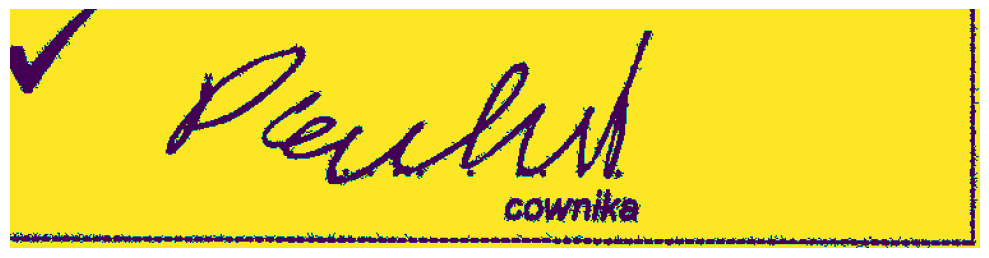

[  0 255]


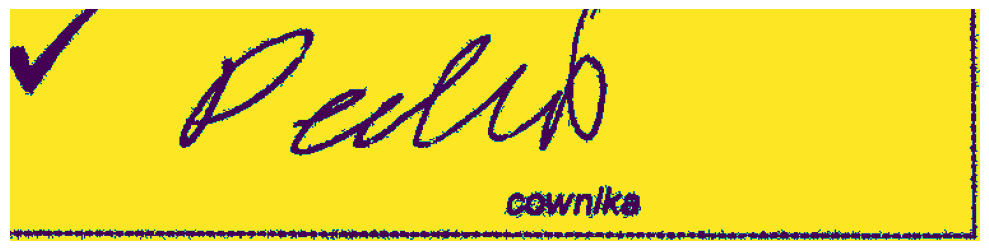

[  0 255]


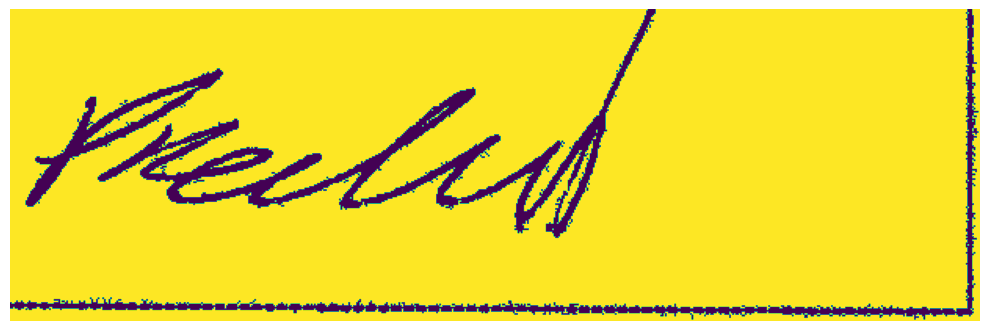

[  0 255]


[  0 255]


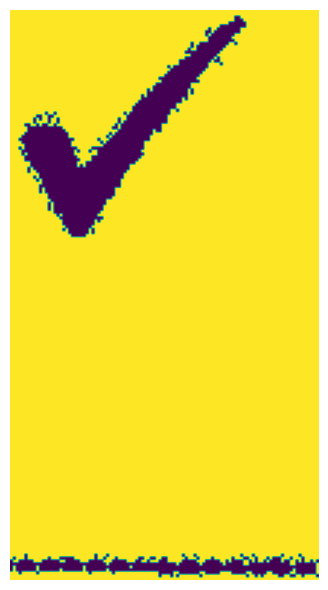

[  0 255]


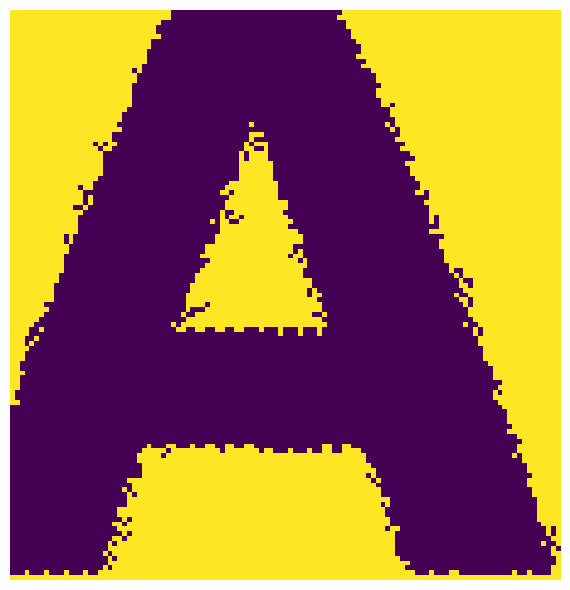

[  0 255]


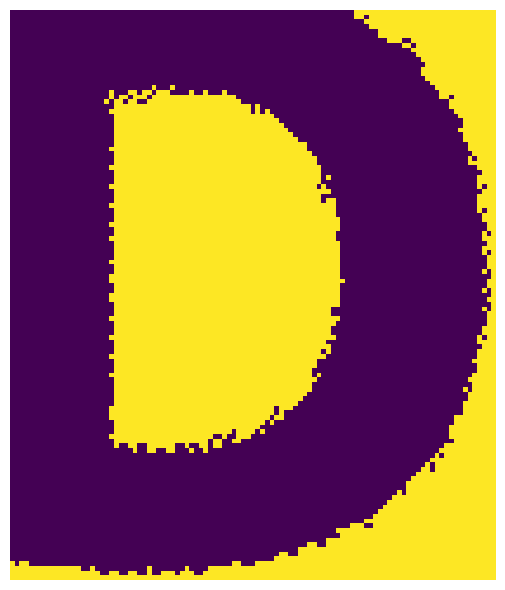

[  0 255]


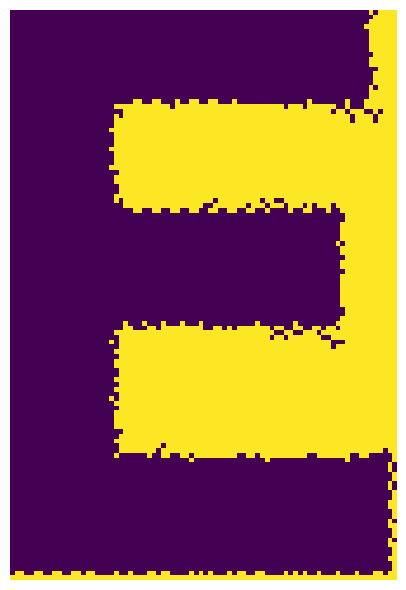

[  0 255]


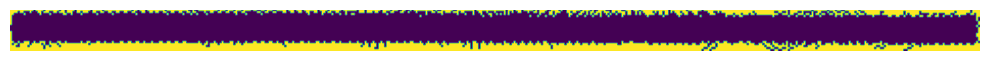

[  0 255]


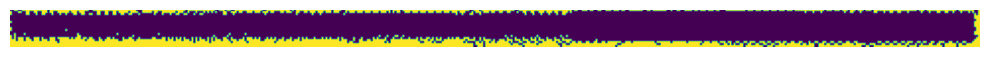

In [19]:
for i in range(len(results)):
    signature = results[i]["cropped_mask"]
    print(np.unique(signature))
    show_image(signature)
    # plt.imsave('./data/output/signature.jpeg', signature)

## Judger

The judger reads the cropped mask and identifies if it's a signature or not.

In [33]:
judger = Judger()
print(judger)


Judger
size_ratio = [1, 4]
pixel_ratio = [0.01, 1]



In [34]:
result = judger.judge(signature)
result

False